# CSCI 271 Data Mining Project

## Preamble

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Misc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV


# Classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



#Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch



# Business Understanding

## Background

Customer churn is the percentage of customers who stop using your product or service within a specific period. It's natural for businesses to have customers come and go, but not all customers will stay. For instance, in telecom, a person might use a service for a few months before switching to another. Managing and reducing churn is crucial because retaining existing customers is much cheaper than acquiring new ones.

## Business Objectives

We want to predict if a customer will churn or not and determine if there are clusters that are more prone to churning than others.

## Situation

## Project Plan

This project addresses two major business goals for a telecommunications company:

1. Churn Prediction (Classification):
Build a supervised machine learning model to predict whether a customer is likely to leave (churn).

2. Customer Segmentation (Clustering):
Apply unsupervised learning to group customers based on behavior, usage, and demographics. This allows for targeted marketing, personalized services, and better product alignment.

# Data Understanding

## Dataset Overview

The dataset is acquired from Kaggle and it contains customer-level information from a telecommunications company. Each row represents a single customer and includes demographics, service subscriptions, billing details, and churn information.

Dataset Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [2]:
df = pd.read_csv("telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Shape of the Dataset

The dataset contains 7043 rows and 21 columns, which means we have data on 7043 customers and 21 features including customer details and churn status.

In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (7043, 21)


### Column Data Types and Non-Null Counts

Most features are objects so it means that we will need preprocessing later to use them in classification and clustering. TotalCharges is listed as an object so we need to convert it later to numerical.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Summary Statistics of Numerical Features

Among the numerical features, about 16% of the customers are senior citizens. The tenure, which represents how long a customer has been with the company, ranges from 0 to 72 months, with a median of 29 months, indicating a mix of new and long-term customers. Monthly charges range from around \$18 to nearly \$119, with a median of approximately \$70, showing that customers pay very different amounts depending on their services. These variations suggest that the dataset includes a wide variety of customer profiles, which may be helpful for identifying patterns or segments during analysis.

In [5]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


### Missing Values

There are no missing values in this dataset which means we do not need to fill null values, but we might have to check later after transforming TotalCharges.

In [6]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Unique Values

The dataset mostly contains features with 2 to 4 values so we need to apply Label Encoding to binary features and One-Hot encoding to multi-class features. 

In [7]:
print(df.select_dtypes(include='object').nunique())

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64


## EDA

### Churn

We can observe that the dataset is imbalanced, with significantly more customers who have not churned. This imbalance may need to be addressed during model training to avoid biasing the predictions towards the majority class.

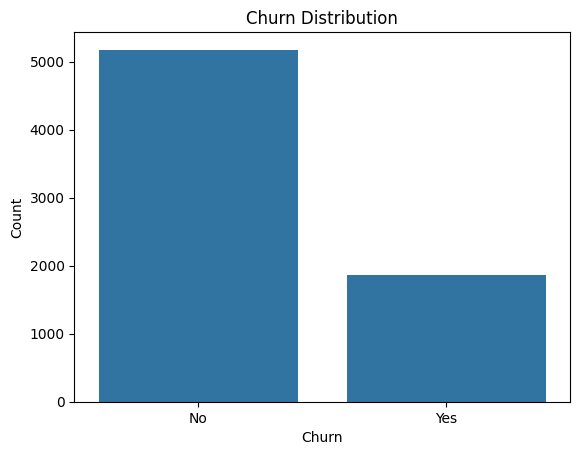

In [8]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


### Demographic

Gender does not play a role in churn. It can be seen that those with partners or are senior citizens has increased chances of leaving the company.

In [38]:
def CountPlot_Table (feature):
    # Create Count Plot for Churn Vs Feature
    sns.countplot(x=feature, hue="Churn", data=df, palette="Paired", edgecolor = 'Black', order=df[feature].value_counts().index)
    sns.despine()
    # Create a plot for proportions
    temp_table = pd.DataFrame(round(df.groupby(feature)['Churn'].value_counts(normalize = True),4))
    table = plt.table(cellText=temp_table.values,
          rowLabels=temp_table.index,
          colLabels=temp_table.columns,
          bbox=(1.5, 0,0.4 , 0.45))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    plt.show()

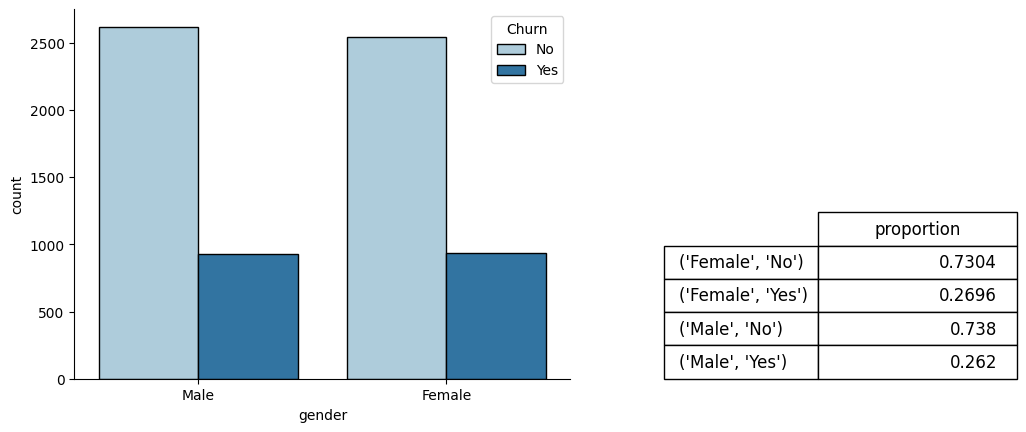

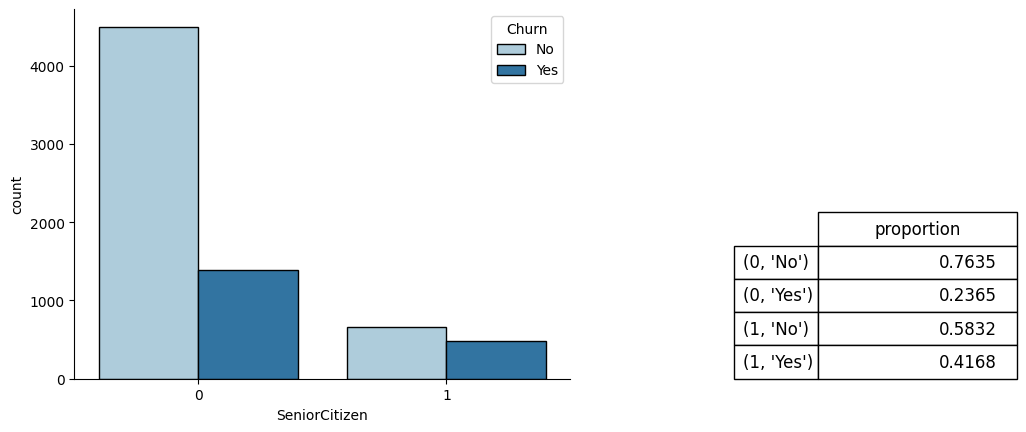

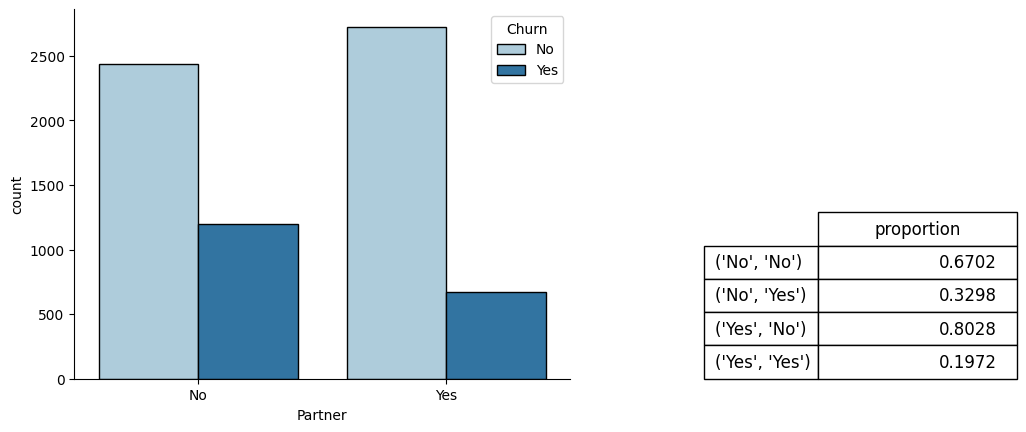

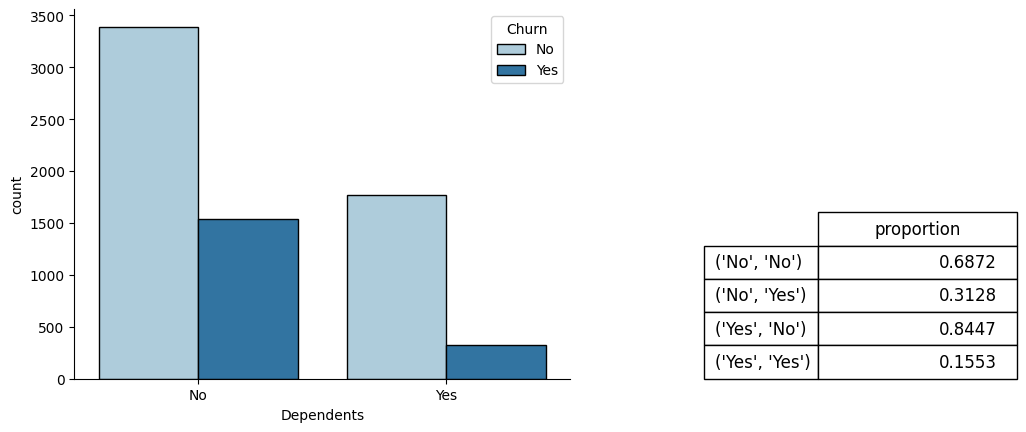

In [39]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']
for feature in demo_features:
    CountPlot_Table(feature)

### Payment Method

Electronic check has the highest churn rate with 1071 out of 2365 customers churning.

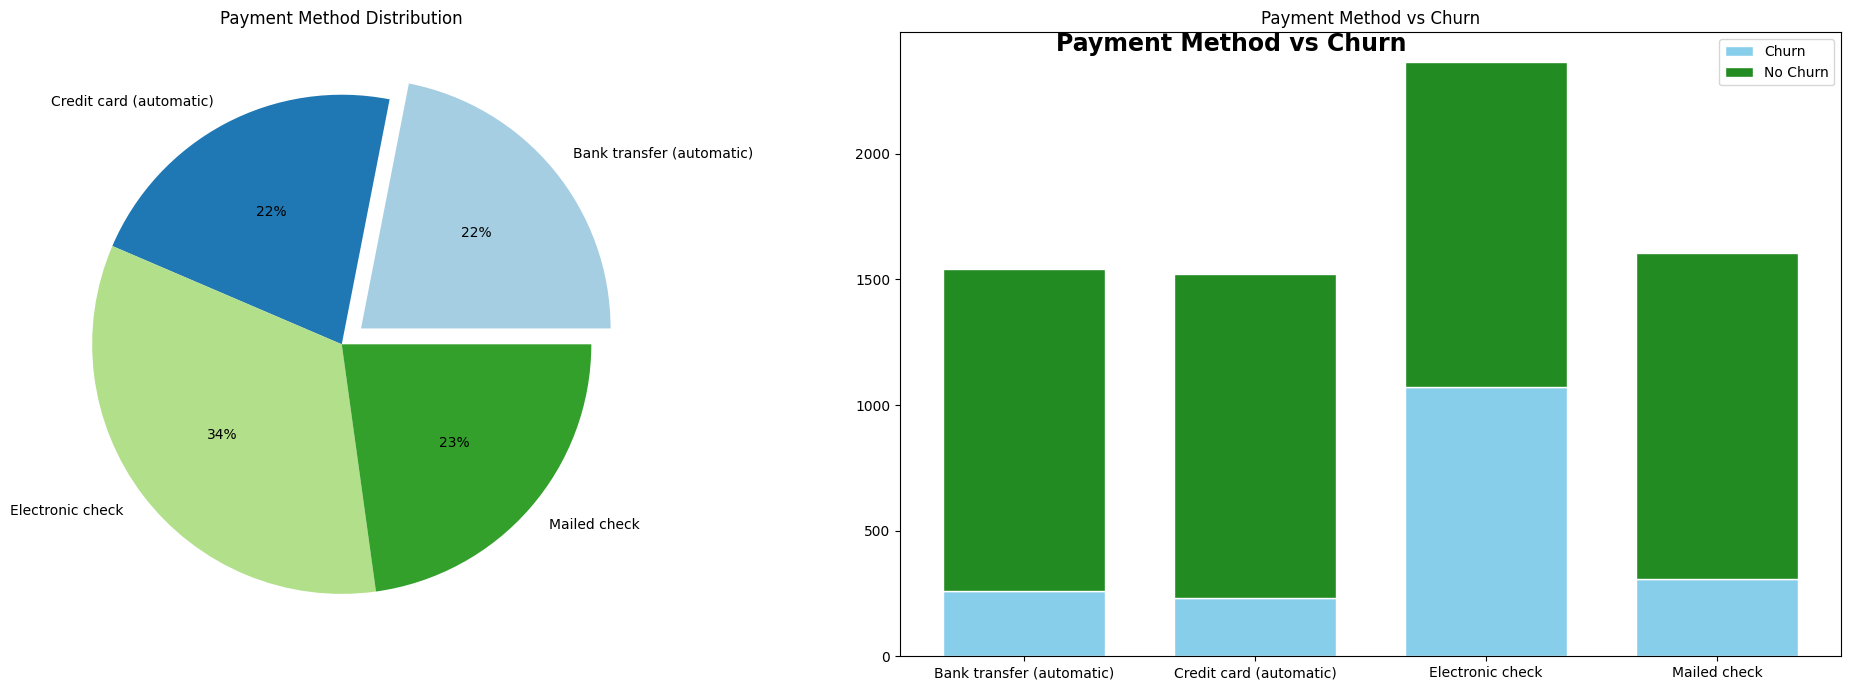

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1284   258
Credit card (automatic)    1289   232
Electronic check           1294  1071
Mailed check               1296   308


In [52]:
# Grouping by PaymentMethod and Churn, then counting occurrences
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# Extracting values for plotting
yes_churn = payment_churn['Yes']  # Customers that churned (Churn = 1)
no_churn = payment_churn['No']   # Customers that didn't churn (Churn = 0)
keys = payment_churn.index    # Unique payment methods

# Declaring exploding pie
explode = [0.1, 0, 0, 0]  # Customize this if you have more categories
# Define Seaborn color palette to use
palette_color = sns.color_palette('Paired')

# Creating the plot with two subplots: pie chart and stacked bar chart
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

# Plotting the pie chart for payment method distribution
ax[0].pie(payment_churn.sum(axis=1), labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')
ax[0].set_title('Payment Method Distribution')

# Plotting the stacked bar chart for churn vs no churn by payment method
ax[1].bar(keys, yes_churn, label='Churn', color='skyblue', edgecolor='white', width=0.7)
ax[1].bar(keys, no_churn, label='No Churn', bottom=yes_churn, color='forestgreen', edgecolor='white', width=0.7)
ax[1].set_title('Payment Method vs Churn')
ax[1].legend()

# Adding a title to the figure
fig.text(0.60, 0.92, 'Payment Method vs Churn', fontsize=17, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

# Displaying the churn counts by payment method for reference
print(payment_churn)


### Tenure

People who have been customers longer are less likely to leave. Most people who leave do so relatively early. But, even some long-time customers eventually leave for different reasons.

C:\Users\Dane\AppData\Local\Temp\ipykernel_25368\1009400095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')


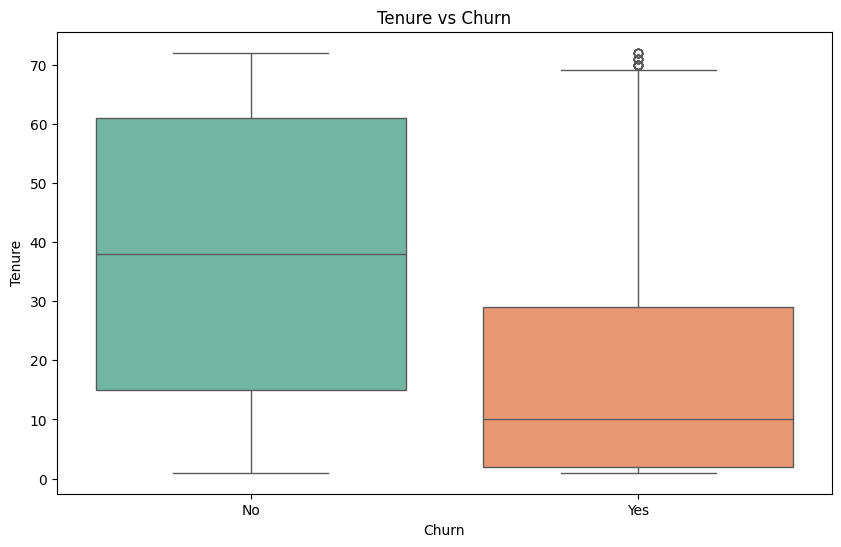

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

### Contracts

Customers who are in month to month contract are likely to churn due to the nature of their agreement which gives them flexibility to move to another service.

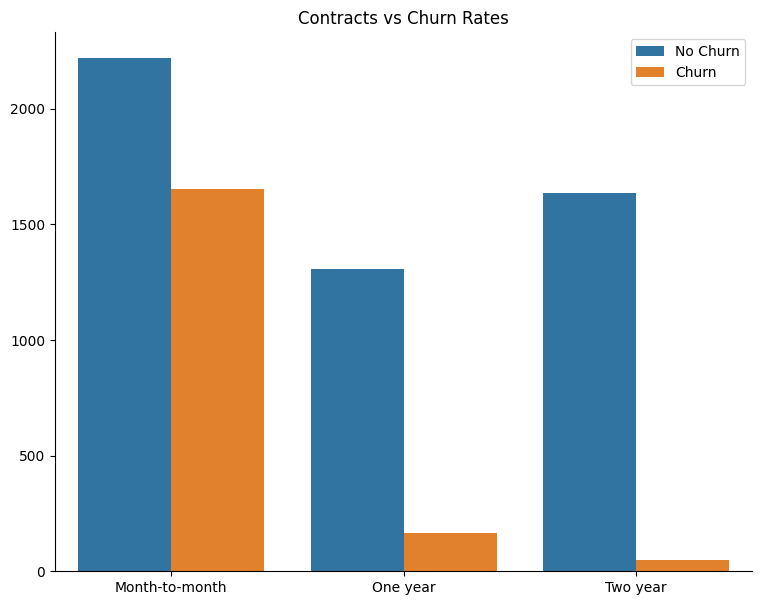

In [60]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x="Contract", hue="Churn", data=df).set(title='Contracts vs Churn Rates', xlabel=None, ylabel = None)
sns.despine()
plt.legend(title='', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

### Monthly and Total Charges

Customer’s with a higher current total monthly charge are  likely to churn.

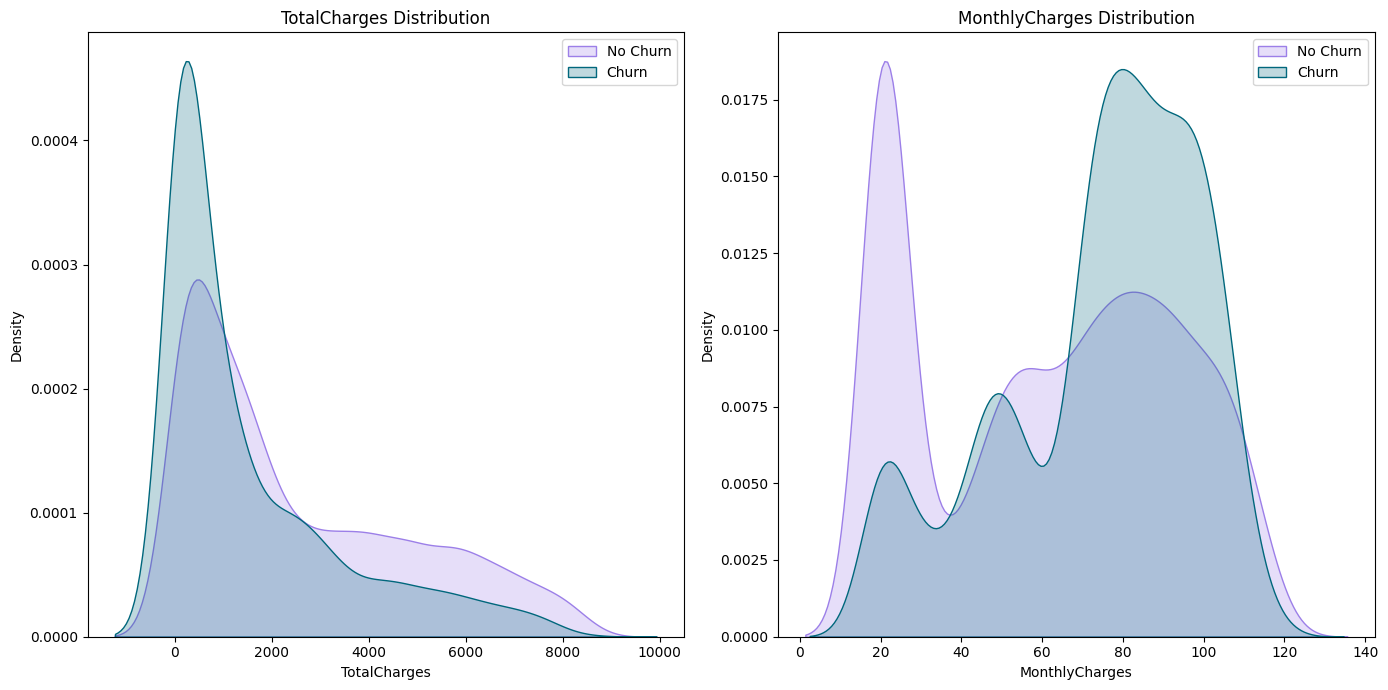

In [70]:
# Clean 'TotalCharges' and 'MonthlyCharges' for 'No Churn' and 'Churn' groups using .loc to avoid the warning
Churn_0 = df[df['Churn'] == 'No'].copy()
Churn_1 = df[df['Churn'] == 'Yes'].copy()

# Convert 'TotalCharges' to numeric, handling errors by coercing them to NaN
Churn_0.loc[:, 'TotalCharges'] = pd.to_numeric(Churn_0['TotalCharges'], errors='coerce')
Churn_1.loc[:, 'TotalCharges'] = pd.to_numeric(Churn_1['TotalCharges'], errors='coerce')

# Make sure 'MonthlyCharges' is numeric for both groups (if necessary)
Churn_0.loc[:, 'MonthlyCharges'] = pd.to_numeric(Churn_0['MonthlyCharges'], errors='coerce')
Churn_1.loc[:, 'MonthlyCharges'] = pd.to_numeric(Churn_1['MonthlyCharges'], errors='coerce')

# Create subplots: one for TotalCharges and one for MonthlyCharges
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# KDE for TotalCharges (using fill under the curve)
sn.kdeplot(Churn_0['TotalCharges'], color="#9C7FE8", fill=True, ax=ax[0])
sn.kdeplot(Churn_1['TotalCharges'], color="#00677C", fill=True, ax=ax[0])
ax[0].set_title('TotalCharges Distribution')
ax[0].legend(["No Churn", "Churn"], loc='upper right')

# KDE for MonthlyCharges (using fill under the curve)
sn.kdeplot(Churn_0['MonthlyCharges'], color="#9C7FE8", fill=True, ax=ax[1])
sn.kdeplot(Churn_1['MonthlyCharges'], color="#00677C", fill=True, ax=ax[1])
ax[1].set_title('MonthlyCharges Distribution')
ax[1].legend(["No Churn", "Churn"], loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()

### Services

Those with no Online Security, Device Protection, and Tech Support Services are likelier to churn. Fiber optic also has a higher churn rate than DSL.

Those with no 

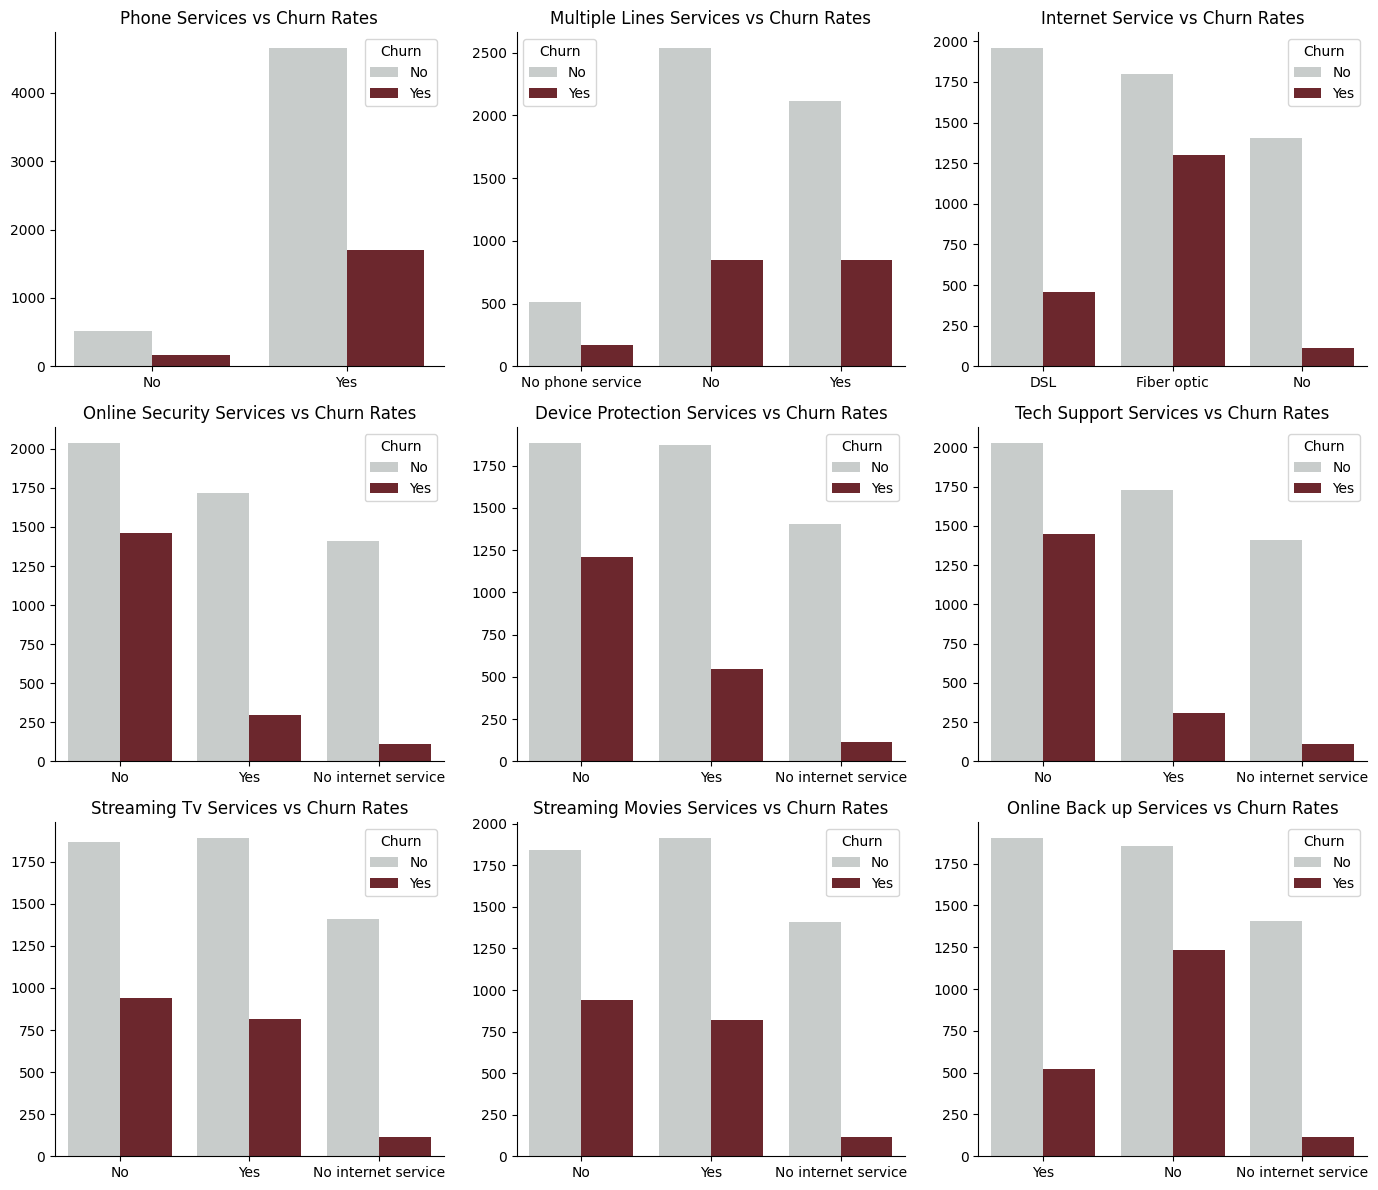

In [71]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))
# Gray for No Churn, highlight Churn!
colors = ["#C7CDCB", "#781B24"]
# Set custom color palette
sn.set_palette(sn.color_palette(colors))
# Graphing
sn.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0]).set(title='Phone Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1]).set(title='Multiple Lines Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2]).set(title='Internet Service vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0]).set(title='Online Security Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,1]).set(title='Device Protection Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[1,2]).set(title='Tech Support Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,0]).set(title='Streaming Tv Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,1]).set(title='Streaming Movies Services vs Churn Rates', xlabel=None, ylabel = None)
sn.countplot(x="OnlineBackup", hue="Churn",data=df, ax=axes[2,2]).set(title='Online Back up Services vs Churn Rates', xlabel=None, ylabel = None)
sn.despine()
plt.tight_layout()
plt.show()

# Data Preparation

In this part, we clean, transform, and prepare the dataset for both classification and clustering tasks.

### Classification

1. Change the data type of TotalCharges as we have observed earlier that it is not numerical.

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

2. Drop the customerID as it does not contribute to the tasks.

In [10]:
df_prepared = df.drop(columns=['customerID'])

3. Identify feature types to know what kind of preprocessing steps required.

In [11]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df_prepared.columns if col not in numerical_features + ['Churn']]

4. Do one-hot encoding for categorical features and scaling for numerical values.

In [ ]:
binary_map = {'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1}
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df_prepared[col] = df_prepared[col].map(binary_map)

df_prepared = pd.get_dummies(df_prepared, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
])

scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_prepared[numeric_cols] = scaler.fit_transform(df[numeric_cols])

5. Do a 70-30 train-test split.

In [13]:
X = df_prepared.drop(columns='Churn')
y = df_prepared['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

6. Apply everything in the pipeline to the dataset.

### Clustering

In [81]:
df_cluster = df_prepared.copy()
df_cluster = df_cluster.drop(['TotalCharges'], axis=1)
df_cluster = df_cluster.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)


# Modeling

## Classification

K-Nearest Neighbors (KNN) and Support Vector Machine (SVM) are both popular supervised learning algorithms used for classification tasks, but they approach the problem differently. Including both models allows for comparison between a distance-based method and a margin-based classifier.



We want to prioritize recall in our evaluation metrics, as missing potential churners is costlier than mistakenly identifying loyal customers as likely to churn. While minimizing both false positives and false negatives is ideal (as reflected in the F1 score), our primary goal is to identify as many actual churners as possible to allow for proactive retention efforts. Although a high number of false positives may lead to some resource inefficiencies, it's a trade-off we're willing to make to ensure that at-risk clients are not overlooked.

### KNN

In [147]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],  # Experiment with different values for n_neighbors
    'weights': ['uniform', 'distance'],   # Check the effect of different weighting schemes
    'metric': ['euclidean', 'manhattan'], # Try different distance metrics
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# GridSearchCV with F1-score as the scoring metric
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='recall', n_jobs=-1)

# Fit the grid search
grid_search_knn.fit(X_train, y_train)

# Print the best parameters and the best F1 score
print("Best parameters found: ", grid_search_knn.best_params_)
print("Best Recall score: ", grid_search_knn.best_score_)

# Use the best model to predict on the test set
best_knn_grid = grid_search_knn.best_estimator_
y_pred_knn_grid = best_knn_grid.predict(X_test)

# Classification report for the best KNN model
print(classification_report(y_test, y_pred_knn_grid))

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Best Recall score:  0.5733614108976046
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1549
           1       0.58      0.56      0.57       561

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.78      0.77      2110



We used the K-Nearest Neighbors (KNN) algorithm to predict customer churn. The model achieved an accuracy of 78% on the test set.

- Non-churners (Class 0) had high precision and recall (both ~85%), meaning the model was effective at identifying customers who stayed.

- Churners (Class 1) had lower precision and recall (~57%), showing that the model struggled more with detecting churn.

- The performance imbalance is likely due to the class imbalance in the dataset.

### SVM

In [146]:
# Define the parameter grid for SVM
param_dist_svm = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
    'class_weight': [None, 'balanced']   # Class weights
}

# Initialize SVM classifier
svm = SVC()

# RandomizedSearchCV with F1-score as the scoring metric
random_search_svm = RandomizedSearchCV(svm, param_distributions=param_dist_svm, 
                                       n_iter=10, cv=5, scoring='recall', 
                                       n_jobs=-1, random_state=42)

# Fit the random search
random_search_svm.fit(X_train, y_train)

# Print the best parameters and the best F1 score
print("Best parameters found: ", random_search_svm.best_params_)
print("Best Recall score: ", random_search_svm.best_score_)

# Use the best model to predict on the test set
best_svm_random = random_search_svm.best_estimator_
y_pred_svm_random = best_svm_random.predict(X_test)

# Classification report for the best SVM model
print(classification_report(y_test, y_pred_svm_random))


Best parameters found:  {'kernel': 'linear', 'gamma': 1, 'class_weight': 'balanced', 'C': 10}
Best Recall score:  0.8379193354976456
              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1549
           1       0.45      0.82      0.58       561

    accuracy                           0.69      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.69      0.71      2110



We trained a Support Vector Machine (SVM) model using a grid search for hyperparameter tuning. The best configuration was:

- kernel='linear', gamma=1, C=10, and class_weight='balanced'.

The model prioritized recall, especially for the churn class, achieving a recall of 83.8% for churners (Class 1).

## Clustering

Clustering techniques like K-Means and Agglomerative Clustering are unsupervised learning methods used to uncover natural groupings within data, especially when no labeled outcome (like churn) is provided. By applying both partition-based and hierarchical approaches, we can explore customer segments from different perspectives.

These clusters help us understand behavioral patterns and identify high-risk groups, such as those with elevated churn rates. This insight allows businesses to tailor retention strategies based on cluster characteristics, even without a predictive model. While clustering doesn’t directly predict churn, it provides valuable segmentation for targeting and deeper analysis.

### KMeans

#### Choice of K

We use the original preprocessed dataset for a more accurate picture of the "true" structure since it's based on the full feature set. Looking at the plot and adhering to the Elbow Method, we choose k=4 as the optimal number of clusters, since this is where the inertia begins to decrease at a slower rate.

In [88]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, n_init=10)  # Explicitly set n_init
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # Plot the elbow curve
    fig = plt.figure(figsize=(10, 7))
    plt.plot(means, inertias, 'o-', color='black')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()


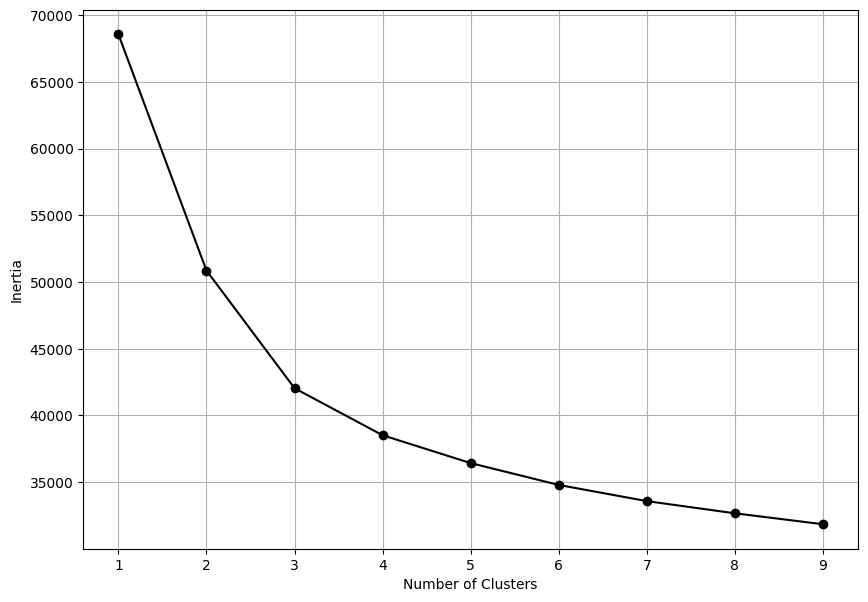

In [89]:
optimise_k_means(df_cluster, 10)

#### PCA

PCA is a technique used to reduce the dimensionality of high-dimensional data while preserving as much variance as possible. By transforming the data into principal components (PCs), we can plot the data in 2D, making it easier to visualize and interpret. 

In [ ]:
# Apply PCA to reduce dimensions to 2 for easy plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_cluster.drop(columns=['cluster', 'Cluster']))  # Remove non-numeric columns

# Show the loadings (feature contributions) for each principal component
pca_loadings = pd.DataFrame(pca.components_, columns=df_cluster.drop(columns=['cluster', 'Cluster']).columns, 
                            index=[f"PC{i+1}" for i in range(pca.n_components_)])

# Optional: Show absolute values of loadings for sorting
abs_pca_loadings = pca_loadings.abs()

# Display the features contributing the most to the first two components
top_features_pc1 = abs_pca_loadings.iloc[0].sort_values(ascending=False).head(5)
top_features_pc2 = abs_pca_loadings.iloc[1].sort_values(ascending=False).head(5)

print("\nTop features contributing to PC1:")
print(top_features_pc1)

print("\nTop features contributing to PC2:")
print(top_features_pc2)



Top features contributing to PC1:
MonthlyCharges                          0.563449
DeviceProtection_No internet service    0.230736
StreamingMovies_No internet service     0.230736
OnlineSecurity_No internet service      0.230736
StreamingTV_No internet service         0.230736
Name: PC1, dtype: float64

Top features contributing to PC2:
tenure                     0.662582
Contract_Month-to-month    0.282768
Contract_Two year          0.204959
DeviceProtection_No        0.201034
TechSupport_No             0.187761
Name: PC2, dtype: float64


 In the PCA results, we observe that the top features contributing to the first two principal components (PC1 and PC2) include variables such as MonthlyCharges, DeviceProtection_No internet service, and StreamingMovies_No internet service. These features seem to play a central role in explaining the variance within the data.

#### Model

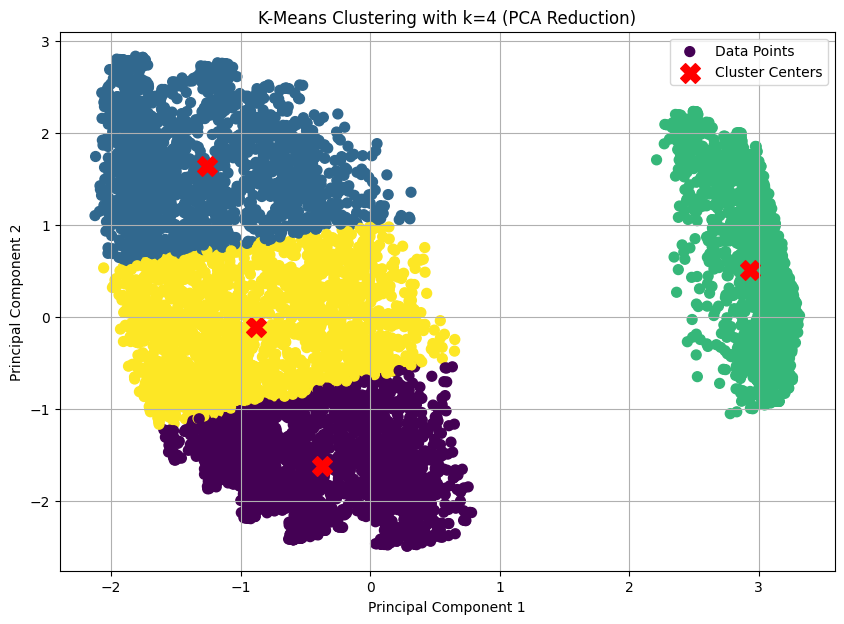

In [118]:

# Fit KMeans clustering to the reduced data
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(reduced_data)

# Assign the cluster labels to the reduced data
df_cluster['Cluster'] = kmeans.labels_

# Plot the reduced data points with clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_cluster['Cluster'], cmap='viridis', s=50, label='Data Points')

# Plot the cluster centers in the reduced space
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

# Adding labels and title
plt.title('K-Means Clustering with k=4 (PCA Reduction)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


### Agglomerative Clustering

#### Dendogram

Looking at the dendrogram and imagining a horizontal line drawn at a distance of approximately 50, it appears that the line would indeed intersect four distinct vertical branches. Based on that distance threshold, we choose 4 clusters.

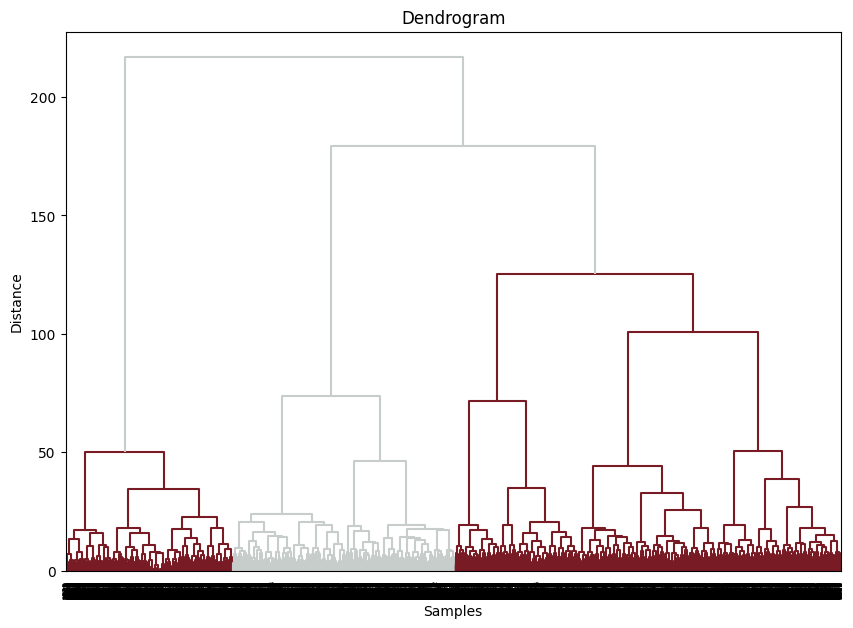

In [153]:
linked = sch.linkage(df_cluster, method='ward')  # or use your full feature set

plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

#### PCA

In [157]:
# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_scaled = pca.fit_transform(df_cluster)

#### Model

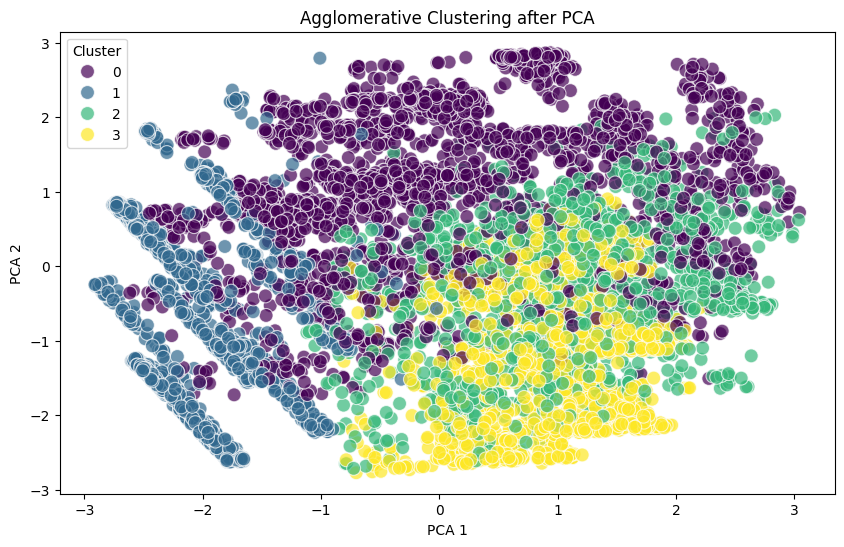

In [158]:

# Perform Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=4)  # Specify the number of clusters
agg_clusters = agg_clust.fit_predict(X_scaled)

# Add cluster labels to your original dataframe
df_cluster['Agglomerative_Cluster'] = agg_clusters

# Plot the 2D PCA results with clustering labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['Agglomerative_Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Agglomerative Clustering after PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

# Evaluation

## Classification Results

The goal of this analysis is to evaluate the performance of two classification models—K-Nearest Neighbors (KNN) and Support Vector Machine (SVM)—in predicting churners for a customer retention strategy. Given that minimizing false negatives (i.e., failing to identify churners) is more critical than minimizing false positives (i.e., mistakenly identifying loyal customers as churners), the recall metric takes precedence in our evaluation. A high recall ensures that as many at-risk clients as possible are identified, enabling proactive retention efforts.

### KNN

#### Best Parameters:


- Metric: Manhattan

- n_neighbors: 13

- Weights: Uniform

#### Performance Metrics

In [159]:
# Classification report for the best KNN model
print(classification_report(y_test, y_pred_knn_grid))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1549
           1       0.58      0.56      0.57       561

    accuracy                           0.78      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.78      0.77      2110



#### Observations

- Recall for class 0 (non-churners) is high at 0.85, indicating that most of the non-churners are correctly identified.

- Recall for class 1 (churners) is 0.56, meaning only about half of the churners are correctly predicted, which is a significant concern in the context of this business goal.

- Precision for class 1 is 0.58, showing that a fair number of churners are misclassified as non-churners, though it is still somewhat reasonable compared to the recall.

- F1-score for class 0 (0.85) is strong, but the low F1-score for class 1 (0.57) highlights the trade-off in performance between classes.

### SVM

#### Best Parameters

- Kernel: Linear

- Gamma: 1

- Class Weight: Balanced

- C: 10

#### Performance Metrics

In [160]:
# Classification report for the best SVM model
print(classification_report(y_test, y_pred_svm_random))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1549
           1       0.45      0.82      0.58       561

    accuracy                           0.69      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.69      0.71      2110



#### Observations

- Recall for class 1 (churners) is 0.82, which is significantly higher than that of KNN. This indicates that the SVM model is far better at identifying churners, aligning closely with the business objective of reducing false negatives (missing churners).

- Precision for class 1 is 0.45, meaning that a substantial portion of the churners are misclassified as non-churners (false positives). Although this is a drawback, it is an acceptable trade-off given the priority of identifying churners.

- F1-score for class 1 (0.58) indicates that while there is a moderate level of balance between recall and precision, the model still leans heavily towards maximizing recall for churners.

- Overall accuracy is 0.69, which reflects the lower number of correctly identified instances compared to KNN, but the focus on churner identification justifies this trade-off.

### Conclusion and Recommendation

In the context of churn prediction, where the primary goal is to minimize false negatives (missing actual churners), the SVM model is recommended for deployment. Despite a lower precision for churners (0.45), the SVM model's recall for churners (0.82) significantly outperforms the KNN model’s recall (0.56). This higher recall ensures that a larger proportion of at-risk customers are identified, which is crucial for the proactive retention efforts that the business aims to implement.

While KNN provides better precision for non-churners, it fails to detect as many churners, and its recall for churners is suboptimal for the business goal. Therefore, the SVM model's ability to identify more churners, even at the cost of higher false positives, makes it the more suitable model for this application.

## Clustering Results

### Kmeans

#### Cluster Analysis

We can observe that clusters 0 and 3 both have a higher rate of churn compared to the rest.

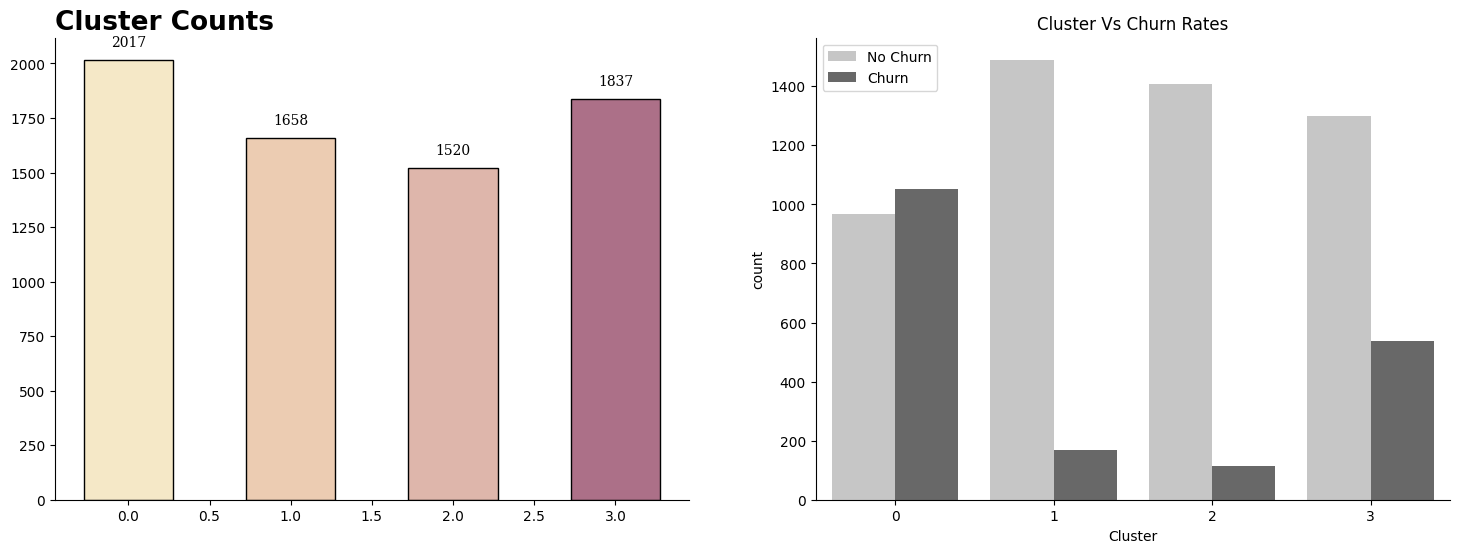

In [119]:
# Cluster Counts Bar Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Count the number of data points in each cluster and sort by cluster index
data_temp = df_cluster['Cluster'].value_counts().sort_index()

# Plot the bar chart with custom colors
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088'], width=0.55)
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')

# Annotating bar heights with the count values
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 80),  # Position slightly above the bars
                   va='center', ha='center', fontweight='light', fontfamily='serif', color='black')

# Hide the top and right spines
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)

# Cluster vs Churn Rates (Countplot)
sn.countplot(x='Cluster', hue="Churn", palette="Greys", data=df_cluster)

# Remove the spines on top and right
sn.despine()

# Adding the legend and title for better clarity
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")

# Show the plots
plt.show()

In [120]:
# Display the mean values of features for Clusters 0 and 3
cluster_0_3_mean = df_cluster[df_cluster['Cluster'].isin([0, 3])].groupby('Cluster').mean()
cluster_0_3_mean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.498761,0.196331,0.251859,0.162618,-0.962982,0.853247,0.673773,-0.038923,0.521071,0.598909,...,0.0,0.220129,0.971740,0.026277,0.001983,0.11056,0.108081,0.543877,0.237481,1.480416
3,0.514970,0.217746,0.506805,0.273272,0.029281,0.872074,0.684812,0.461862,0.292324,0.364725,...,0.0,0.537289,0.659227,0.271639,0.069134,0.22319,0.209581,0.419162,0.148068,1.691345


##### Cluster 0:



- Gender: Gender does not seem to have a significant impact in this cluster.

- SeniorCitizen: Senior citizens show a moderate presence, suggesting that this group might not be a primary driver of churn, though further investigation into senior citizens across other clusters could help refine this.

- Partner and Dependents: These customers tend to have fewer dependents and are less likely to have a partner, indicating a potential higher likelihood of churn for single or family-less customers.

- Tenure: Negative tenure values (-0.962982) suggest that customers in this cluster have been with the company for a shorter period, which correlates with higher churn as newer customers are more likely to cancel early.

- Monthly Charges: These customers have slightly negative values for monthly charges, which may imply that the charges are comparatively lower, potentially indicating they are on less costly plans. However, more context is needed to see how this directly influences churn.

- Services: High usage of PhoneService and PaperlessBilling, and low usage of StreamingMovies and multiple lines suggest that these customers might be on basic plans, possibly making them more price-sensitive and thus more likely to churn when they feel they’re not getting enough value.

- Contract Type: Customers in this cluster seem to be on a Month-to-month contract (Contract_Month-to-month = 0.971740). These contracts often lead to higher churn rates because customers can easily cancel their services without long-term commitments.

The higher churn rate in Cluster 0 is likely driven by a combination of shorter tenure, lower monthly charges, and the high usage of month-to-month contracts. These customers may be more likely to leave because they are not tied to long-term agreements and are potentially seeking lower-cost alternatives.

##### Cluster 3

- SeniorCitizen: There is a higher proportion of senior citizens in this cluster (0.217746), which could indicate that older customers may exhibit different churn behaviors compared to younger ones.

- Partner and Dependents: Higher proportion of customers with dependents and partners, suggesting that this group might represent families or individuals with higher financial stability, which could make them less likely to churn.

- Tenure: Tenure in this cluster is slightly positive (0.029281), suggesting these customers have been with the company longer than those in Cluster 0. A longer tenure often correlates with reduced churn rates, though not in every case.

- Monthly Charges: Monthly charges are moderately high (0.461862), which might suggest that customers in this cluster are on mid-range or higher plans. This could point to higher expectations of service quality and a greater tendency to leave if those expectations are unmet.

- Services: Similar to Cluster 0, these customers have a high adoption of PhoneService and PaperlessBilling. They also show moderate usage of StreamingMovies, which suggests a more diverse service portfolio.

- Contract Type: There is a relatively high usage of Month-to-month contracts here as well (0.659227), which again might drive higher churn, as customers are not locked into longer contracts.

- Payment Method: This cluster is notably more likely to use Electronic checks (0.22319), which can sometimes be linked to dissatisfaction or issues with payment processing.

Despite having a slightly higher tenure and more family-related characteristics, the moderate-to-high charges, combined with the flexibility of month-to-month contracts, suggest this cluster still has a significant churn risk. The presence of older customers and those using electronic checks also implies there may be issues with payment processing or service dissatisfaction, contributing to churn.

### Agglomerative Clustering

#### Cluster Analysis

We can observe here that Cluster 0 has high churn rate, but Cluster 3 has little to no churn at all.

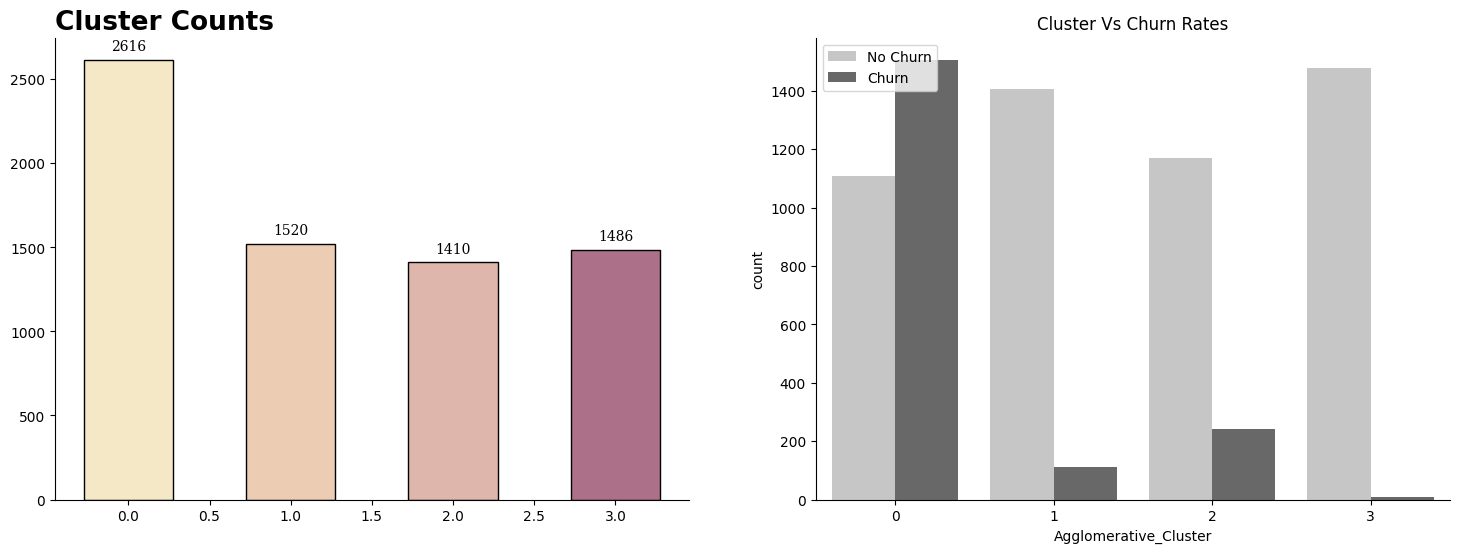

In [161]:
# Cluster Counts Bar Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Count the number of data points in each cluster and sort by cluster index
data_temp = df_cluster['Agglomerative_Cluster'].value_counts().sort_index()

# Plot the bar chart with custom colors
ax[0].bar(data_temp.index, data_temp,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088'], width=0.55)
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')

# Annotating bar heights with the count values
for i in data_temp.index:
    ax[0].annotate(f"{data_temp[i]}", 
                   xy=(i, data_temp[i] + 80),  # Position slightly above the bars
                   va='center', ha='center', fontweight='light', fontfamily='serif', color='black')

# Hide the top and right spines
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)

# Cluster vs Churn Rates (Countplot)
sn.countplot(x='Agglomerative_Cluster', hue="Churn", palette="Greys", data=df_cluster)

# Remove the spines on top and right
sn.despine()

# Adding the legend and title for better clarity
plt.legend(title='', loc='upper left', labels=['No Churn', 'Churn'])
plt.title("Cluster Vs Churn Rates")

# Show the plots
plt.show()

##### Cluster 0 

In [163]:
# Display the mean values of features for Cluster 0
cluster_0_mean = df_cluster[df_cluster['Agglomerative_Cluster'] == 0].mean()
cluster_0_mean

gender                                     0.495413
SeniorCitizen                              0.266820
Partner                                    0.309251
Dependents                                 0.165902
tenure                                    -0.785978
PhoneService                               0.886850
PaperlessBilling                           0.706804
MonthlyCharges                             0.170237
Churn                                      0.576070
MultipleLines_No                           0.526376
MultipleLines_No phone service             0.113150
MultipleLines_Yes                          0.360474
InternetService_DSL                        0.393731
InternetService_Fiber optic                0.606269
InternetService_No                         0.000000
OnlineSecurity_No                          0.835627
OnlineSecurity_No internet service         0.000000
OnlineSecurity_Yes                         0.164373
OnlineBackup_No                            0.767966
OnlineBackup

- Gender: The mean value of 0.495 indicates that the gender distribution in Cluster 0 is roughly equal between male and female customers.

- SeniorCitizen: With a mean of 0.267, this suggests that only a small proportion of Cluster 0 consists of senior citizens.

- Partner: The mean of 0.309 indicates that around 31% of Cluster 0's members have a partner.

- Dependents: The mean value of 0.166 indicates that very few customers in Cluster 0 have dependents.

- Tenure: A negative mean value of -0.786 for tenure suggests that the customers in Cluster 0 may have relatively low tenure, meaning they could be newer customers.

- PhoneService: The mean of 0.887 shows that most of the customers in Cluster 0 have phone service.

- PaperlessBilling: A mean of 0.707 suggests that a majority of customers in Cluster 0 use paperless billing.

- MonthlyCharges: The mean value of 0.170 implies that customers in Cluster 0 have relatively low monthly charges compared to other clusters.

- Churn: A mean of 0.576 indicates a fairly high churn rate, with more than half of the customers in this cluster likely to have churned.

- MultipleLines_No: A mean of 0.526 suggests that about half of the customers in this cluster do not have multiple lines.

- Contract_Month-to-month: With a high mean of 0.959, Cluster 0 is predominantly made up of customers with month-to-month contracts.

- PaymentMethod_Electronic check: The mean value of 0.557 indicates that a large portion of customers in Cluster 0 use electronic checks as a payment method.

Cluster 0 seems to be characterized by newer customers (low tenure), a high churn rate, a preference for month-to-month contracts, and a strong inclination towards paperless billing and electronic check payments. These customers are less likely to have dependents or be senior citizens. It appears that they are also more likely to have phone service and online security options, but with relatively low monthly charges.

##### Cluster 3

In [164]:
# Display the mean values of features for Cluster 0
cluster_3_mean = df_cluster[df_cluster['Agglomerative_Cluster'] == 3].mean()
cluster_3_mean

gender                                     0.499327
SeniorCitizen                              0.018843
Partner                                    0.724764
Dependents                                 0.425303
tenure                                     1.096556
PhoneService                               0.902423
PaperlessBilling                           0.639300
MonthlyCharges                             0.753932
Churn                                      0.005384
MultipleLines_No                           0.250336
MultipleLines_No phone service             0.097577
MultipleLines_Yes                          0.652086
InternetService_DSL                        0.500673
InternetService_Fiber optic                0.499327
InternetService_No                         0.000000
OnlineSecurity_No                          0.365410
OnlineSecurity_No internet service         0.000000
OnlineSecurity_Yes                         0.634590
OnlineBackup_No                            0.288694
OnlineBackup

- Gender: The mean value of 0.499 indicates that the gender distribution in Cluster 3 is nearly equal between male and female customers.

- SeniorCitizen: With a mean of 0.019, this suggests that only a very small proportion of Cluster 3 consists of senior citizens.

- Partner: The mean of 0.725 indicates that a significant majority (about 73%) of Cluster 3's members have a partner.

- Dependents: The mean value of 0.425 shows that around 43% of customers in Cluster 3 have dependents.

- Tenure: A high mean value of 1.097 suggests that customers in Cluster 3 tend to have long tenure, indicating they are likely long-term customers.

- PhoneService: The mean of 0.902 shows that most customers in Cluster 3 have phone service.

- PaperlessBilling: A mean of 0.639 suggests that a majority of customers in Cluster 3 use paperless billing.

- MonthlyCharges: The mean value of 0.754 indicates that customers in Cluster 3 tend to have relatively high monthly charges compared to other clusters.

- Churn: A very low mean of 0.005 implies that almost none of the customers in Cluster 3 have churned, highlighting strong customer retention.

- MultipleLines_No: A mean of 0.250 suggests that only a quarter of customers in this cluster do not have multiple lines.

- Contract_Month-to-month: With a low mean of 0.115, few customers in Cluster 3 are on month-to-month contracts.

- Contract_Two year: The high mean of 0.555 shows that over half of the customers in this cluster are on two-year contracts, indicating long-term commitment.

- PaymentMethod_Electronic check: The mean value of 0.212 suggests that a relatively small portion of customers in Cluster 3 use electronic checks as a payment method.

Cluster 3 is characterized by long-term, loyal customers with high tenure and a very low churn rate. These customers often have partners and dependents, use paperless billing, and tend to have higher monthly charges. They prefer long-term contracts—especially two-year plans—and are less likely to use electronic checks. This cluster seems to represent a stable and valuable customer base for the company.

# Deployment

## Plan Deployment
The SVM model will be deployed as the final churn prediction model, as it prioritizes recall (0.82) for churners. This ensures more at-risk customers are captured for targeted retention campaigns.

### Method of deployment:

- Batch scoring: The model will run weekly to score customers based on churn likelihood.

- Output: A ranked list of customers with churn probability, stored in a .csv format accessible to the marketing team.

### Integration: Optional integration with CRM or campaign tools for automation in the future.

## Plan Monitoring and Maintenance

### Monitoring:

- Weekly churn prediction reports with churn vs actual feedback (if available).

- Monthly recalibration of precision/recall scores.

### Maintenance:

- Quarterly retraining of the SVM model using updated customer data.

- Re-clustering customer segments every 6 months to ensure segment stability and updated behavioral insights.

## Final Report

### Model Selection Summary
- Chosen model: Support Vector Machine (SVM)

- Reason: High recall for churners (0.82), ensuring fewer at-risk customers are missed.

- Tradeoff: Accepting higher false positives to enable proactive retention.

### Clustering Insights
- KMeans – Cluster 0: High churn group; short tenure, low charges, and high use of month-to-month contracts.

- KMeans – Cluster 3: Moderate churn risk; family-related traits but still month-to-month flexibility.

- Agglomerative – Cluster 0: Similar to KMeans Cluster 0; characterized by low tenure, paperless billing, and preference for electronic check payments.

- Agglomerative – Cluster 3: Stable customer base; long-tenure, higher charges, family-oriented, preferring two-year contracts.

These insights can guide targeted interventions per cluster (e.g., loyalty programs for Cluster 3, promotional offers for Cluster 0).

## Review Project
### What went well:

- Clear alignment between clustering outputs and churn prediction insights.

- High-performing model chosen based on business-prioritized metric (recall).

### What could improve:

- Additional features (e.g., service complaint data, customer satisfaction scores) could improve prediction accuracy.

### Future considerations:

- A/B testing of targeted retention strategies using model outputs.

- Explore ensemble models or cost-sensitive learning to further balance precision/recall.